In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/seqLen100/experimentalConditions"

In [3]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
epochs = 20
learning_rate = 0.00001
batch_size = 2**11
lambda_l1 = 0.00001
hidden_size_factor = 2
bottleneck = 1/2

In [4]:
model, history = MIMENet.train(training_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck, simulation_path+'/secondFromProt1/prot1/single_kds.txt')

Device: cuda:0
Epoch: 1/20


100%|██████████| 400/400 [00:00<00:00, 2003.27it/s]


Epoch: 2/20


100%|██████████| 400/400 [00:00<00:00, 1662.81it/s]


Epoch: 3/20


100%|██████████| 400/400 [00:00<00:00, 2508.40it/s]


Epoch: 4/20


100%|██████████| 400/400 [00:00<00:00, 2077.64it/s]


Epoch: 5/20


100%|██████████| 400/400 [00:00<00:00, 2268.14it/s]


Epoch: 6/20


100%|██████████| 400/400 [00:00<00:00, 2022.82it/s]


Epoch: 7/20


100%|██████████| 400/400 [00:00<00:00, 2486.29it/s]


Epoch: 8/20


100%|██████████| 400/400 [00:00<00:00, 2022.71it/s]


Epoch: 9/20


100%|██████████| 400/400 [00:00<00:00, 2441.62it/s]


Epoch: 10/20


100%|██████████| 400/400 [00:00<00:00, 2374.92it/s]


Epoch: 11/20


100%|██████████| 400/400 [00:00<00:00, 1999.78it/s]


Epoch: 12/20


100%|██████████| 400/400 [00:00<00:00, 2239.98it/s]


Epoch: 13/20


100%|██████████| 400/400 [00:00<00:00, 2195.71it/s]


Epoch: 14/20


100%|██████████| 400/400 [00:00<00:00, 2328.69it/s]


Epoch: 15/20


100%|██████████| 400/400 [00:00<00:00, 2266.29it/s]


Epoch: 16/20


100%|██████████| 400/400 [00:00<00:00, 2315.43it/s]


Epoch: 17/20


100%|██████████| 400/400 [00:00<00:00, 2358.42it/s]


Epoch: 18/20


100%|██████████| 400/400 [00:00<00:00, 2173.57it/s]


Epoch: 19/20


100%|██████████| 400/400 [00:00<00:00, 1913.61it/s]


Epoch: 20/20


100%|██████████| 400/400 [00:00<00:00, 2294.44it/s]


In [5]:
#save model
torch.save(model.state_dict(), './modelExpCond.pth')

In [6]:
#save training history as json
with open('./history_exp.json', 'w') as f:
    json.dump(history, f)

In [7]:
#load saved model, training history, and prediction history
input_size = len(open(training_path).readline().split(' ')) - 1
model = MIMENet.MIMENet(input_size, hidden_size_factor, bottleneck, 1)
model.load_state_dict(torch.load('./modelExpCond.pth'))
#puto model to gpu
model.to('cuda:0')
#put model in eval mode
model.eval()
#load history
with open('./history_exp.json', 'r') as f:
    history = json.load(f)

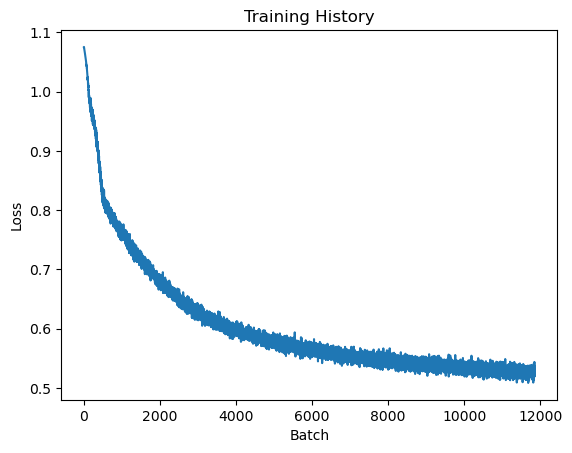

In [8]:
#plot training history
plt.plot(history['training'])
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Batch")
#limit x axis
#plt.xlim(0, 1000)
plt.show()

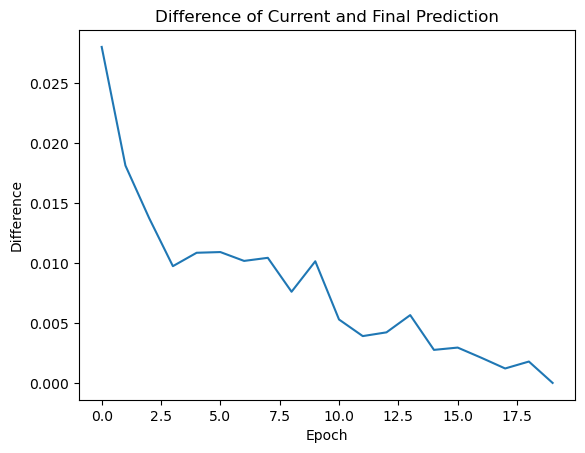

In [9]:
#plot difference of current and final prediction

#initialize difference array
predictions = np.array(history['prediction'])
difference = np.zeros((predictions.shape[0], predictions.shape[1]))
#calculate difference
for i in range(predictions.shape[0]):
    difference[i] = np.abs(predictions[i] - predictions[-1])
#average over columns
difference = np.mean(difference, axis=1)
#plot difference
plt.plot(difference)
plt.title("Difference of Current and Final Prediction")
plt.ylabel("Difference")
plt.xlabel("Epoch")
plt.show()

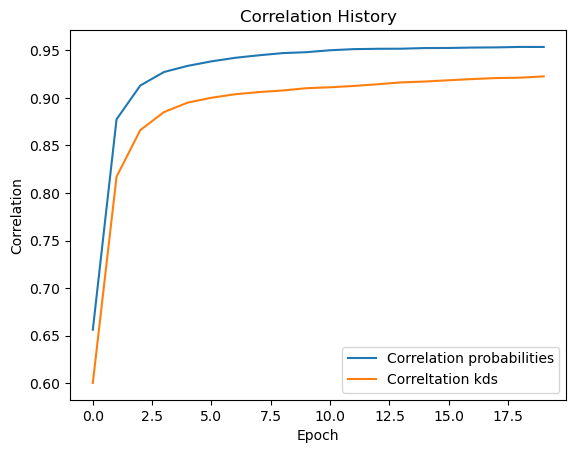

In [10]:
#plot correlation history rows as lines
plt.plot(history['correlation_probs'], label='Correlation probabilities')
plt.plot(history['correlation_kds'], label='Correltation kds')
plt.legend()
plt.title("Correlation History")
plt.ylabel("Correlation")
plt.xlabel("Epoch")
plt.show()

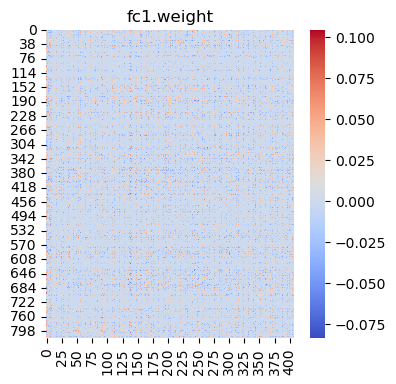

max weight value:  0.10426096
min weight value:  -0.08313446
number of pruned weights:  158709
number of non zero weights:  174219


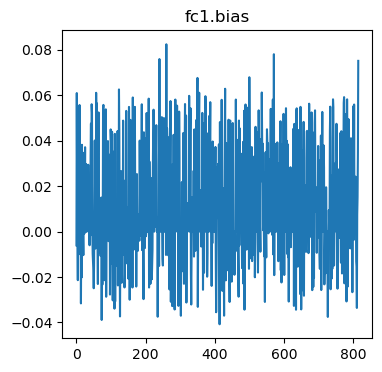

max bias value:  0.08246793
min bias value:  -0.040805142
number of pruned biases:  136
number of non zero biases:  680


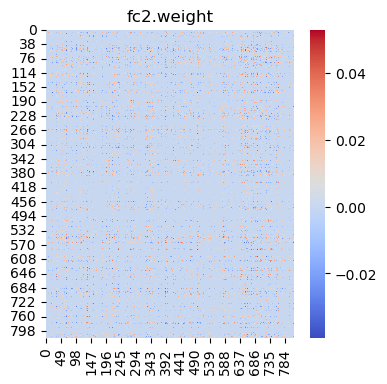

max weight value:  0.053022176
min weight value:  -0.039218362
number of pruned weights:  513882
number of non zero weights:  151974


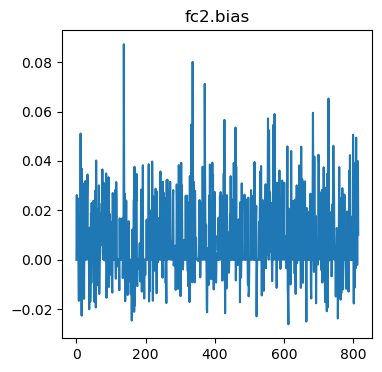

max bias value:  0.08724917
min bias value:  -0.026188696
number of pruned biases:  288
number of non zero biases:  528


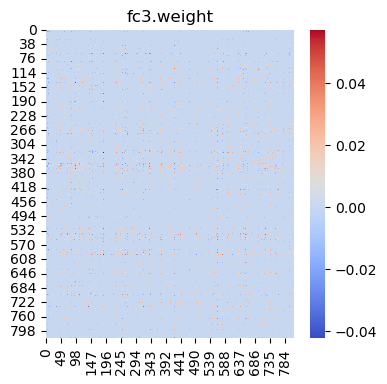

max weight value:  0.05724326
min weight value:  -0.042143505
number of pruned weights:  587634
number of non zero weights:  78222


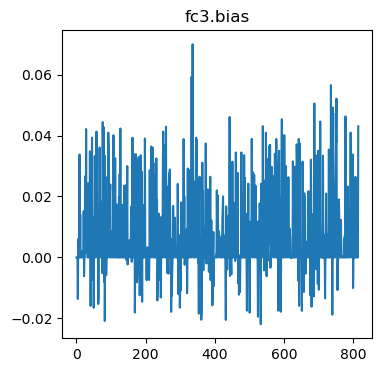

max bias value:  0.069999844
min bias value:  -0.021983523
number of pruned biases:  347
number of non zero biases:  469


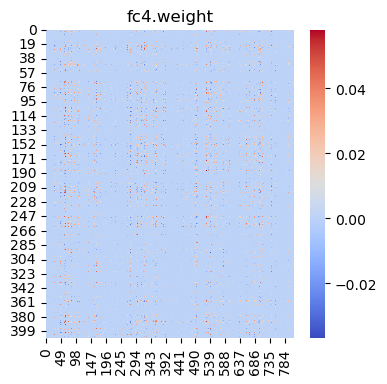

max weight value:  0.05804034
min weight value:  -0.03666367
number of pruned weights:  282044
number of non zero weights:  50884


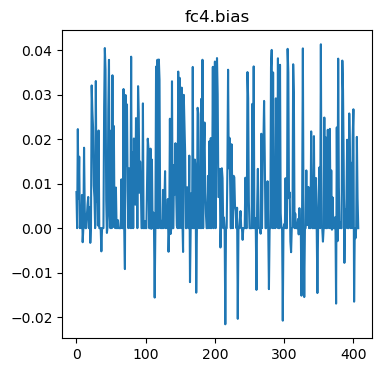

max bias value:  0.041295
min bias value:  -0.02158733
number of pruned biases:  152
number of non zero biases:  256


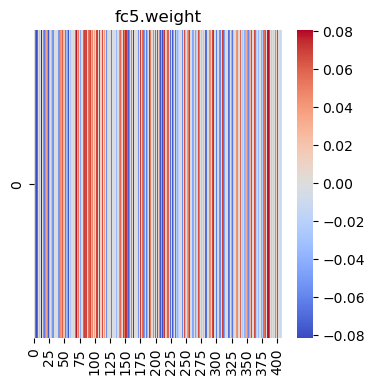

max weight value:  0.08065342
min weight value:  -0.08155453
number of pruned weights:  139
number of non zero weights:  269


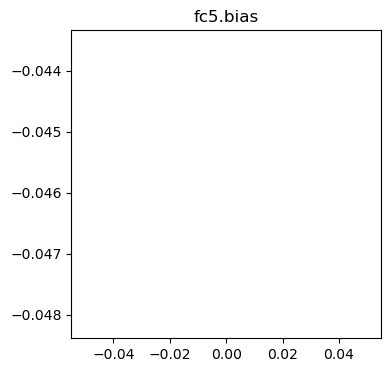

max bias value:  -0.0458613
min bias value:  -0.0458613
number of pruned biases:  0
number of non zero biases:  1


In [11]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [12]:
#get percent of parameters pruned
total_params = 0
pruned_params = 0
for param in model.parameters():
    total_params += param.numel()
    pruned_params += np.sum(param.data.cpu().numpy() == 0)
print('percent of parameters pruned: ', pruned_params/total_params)

percent of parameters pruned:  0.77134423512607


In [13]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 0.212905, 0.362492, 1.      , 1.      , 0.393369,
       3.48016 , 1.      , 1.      , 1.      ])

In [14]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictions = MIMENet.inferSingleProbabilities(model, input_size)

100%|██████████| 400/400 [00:00<00:00, 1889.51it/s]


In [15]:
#calculate predicted kds by 1/prediction - 1
predicted_kds = 1/np.array(predictions) - 1

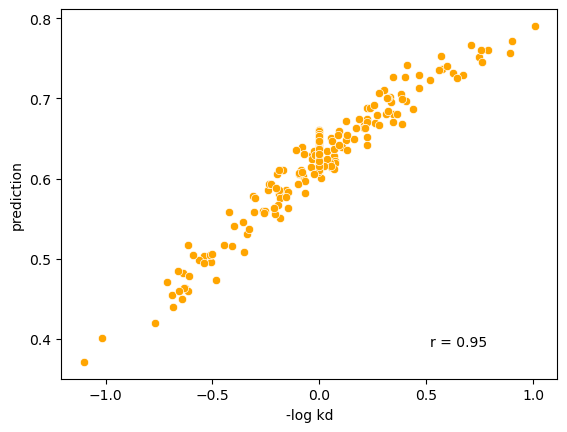

In [16]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log10(kds), predictions)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Text(0, 0.5, 'z score')

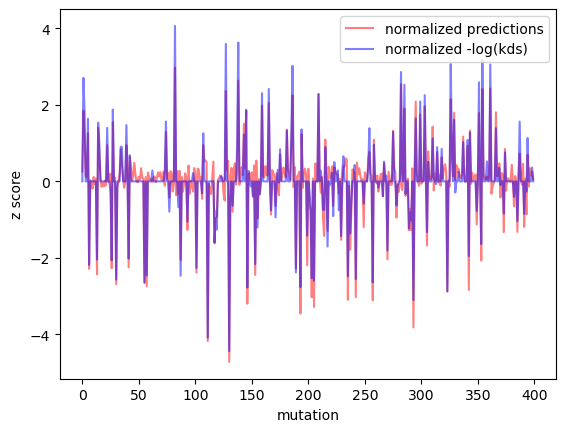

In [17]:
#z score predictions
predictionsNorm = (predictions - np.mean(predictions))/np.std(predictions)

#z score -np.log(kds)
kdsNorm = (-np.log10(kds) - np.mean(-np.log10(kds)))/np.std(-np.log10(kds))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(predictionsNorm)), y=predictionsNorm, label='normalized predictions', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(kdsNorm)), y=kdsNorm, label='normalized -log(kds)', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('z score')

(0.0, 1.0)

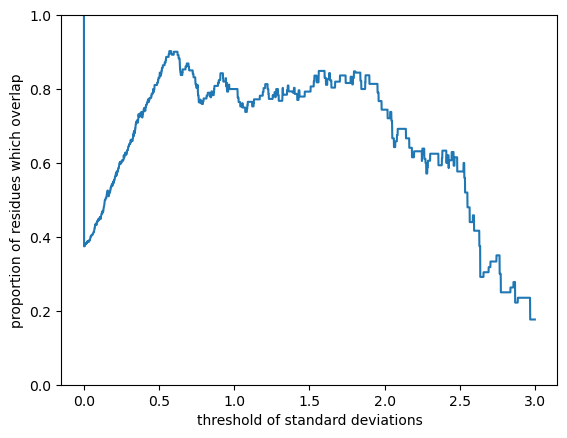

In [18]:
#check overlap of normalized predictions and normalized -log(kds) for absolute value greater than 0.5
#loop over threshold values
overlapProportions = []
for threshold in np.arange(0, 3, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(predictionsNorm) > threshold)[0]
    indices2 = np.where(np.abs(kdsNorm) > threshold)[0]
    #get the intersection of the two sets of indices
    overlap = np.intersect1d(indices, indices2)
    #get the proportion of the intersection to the union of the two sets of indices
    overlapProportions.append(len(overlap)/len(np.union1d(indices, indices2)))

#plot overlapProportions
sns.lineplot(x=np.arange(0, 3, 0.001), y=overlapProportions)
plt.xlabel('threshold of standard deviations')
plt.ylabel('proportion of residues which overlap')
plt.ylim(0, 1)

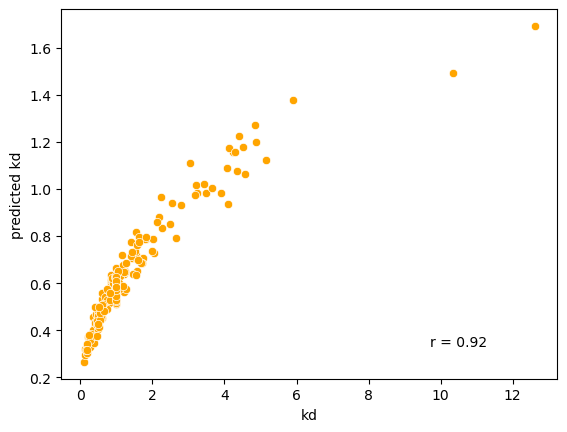

In [19]:
#plot predicted kds vs actual kds
sns.scatterplot(x=kds, y=predicted_kds, color='orange')
plt.xlabel('kd')
plt.ylabel('predicted kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kds, predicted_kds)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

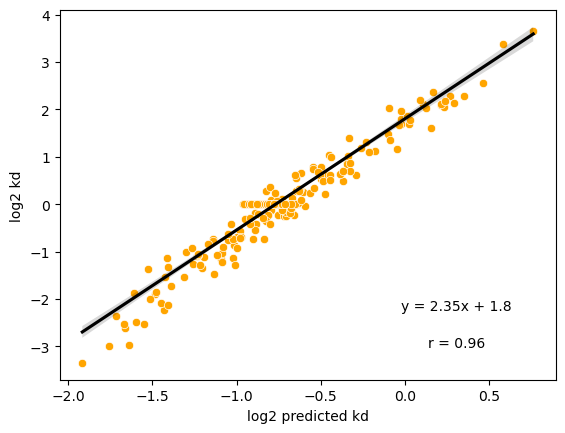

In [20]:
#plot log2 predicted kd vs log2 kd
sns.scatterplot(x=np.log2(predicted_kds), y=np.log2(kds), color='orange')
plt.xlabel('log2 predicted kd')
plt.ylabel('log2 kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(predicted_kds), np.log2(kds))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(predicted_kds), y=np.log2(kds), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

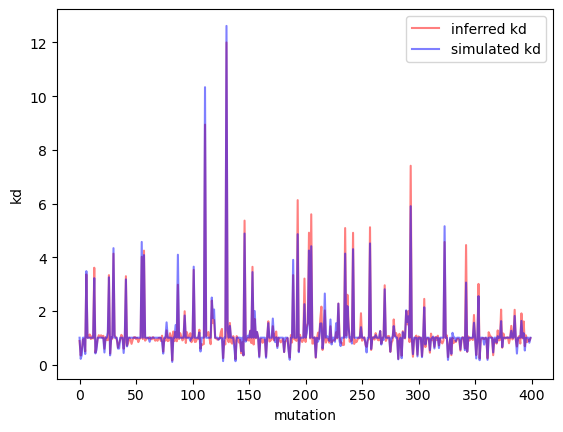

In [32]:
#lienplot of predicted kds
sns.lineplot(x=np.arange(len(predicted_kds)), y=2**(2.35*np.log2(predicted_kds)+1.8), label='inferred kd', color='red', alpha=0.5)
#lineplot of actual kds
sns.lineplot(x=np.arange(len(kds)), y=kds, label= 'simulated kd', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('kd')
plt.legend()
plt.show()

In [22]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictionsPairwise = MIMENet.inferPairwiseProbabilities(model, input_size)

100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


In [23]:
pairwisePredictedKds = 1/np.array(predictionsPairwise) - 1

In [24]:
#load pairwise kd values
kdsPairwise = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_kds.txt')
kdsPairwise[0:10]

array([0.0837502, 0.740943 , 0.212905 , 0.142593 , 1.26153  , 0.362492 ,
       0.393369 , 3.48016  , 1.       , 0.212905 ])

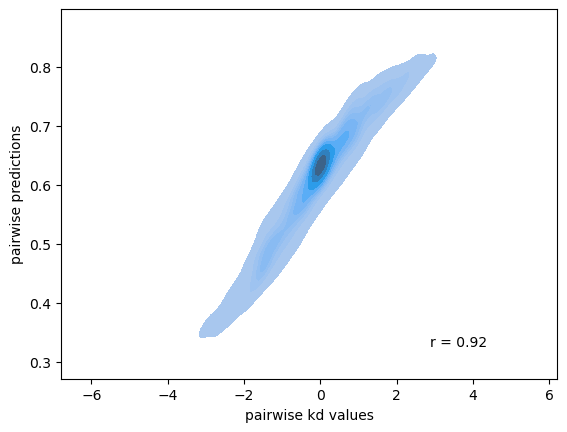

In [25]:
#get correlation coefficient
np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=-np.log(kdsPairwise), y=predictionsPairwise, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predictions')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

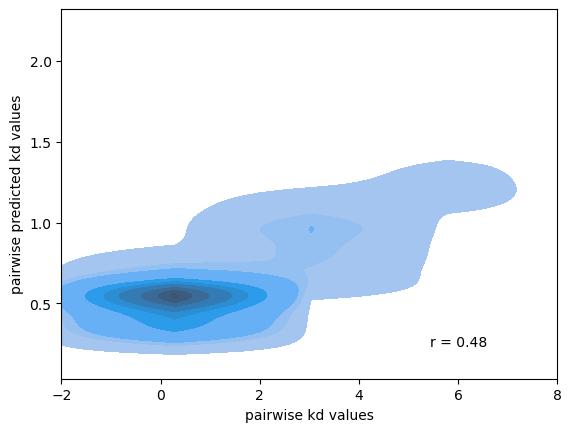

In [26]:
#get correlation coefficient
np.corrcoef(kdsPairwise, pairwisePredictedKds)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=kdsPairwise, y=pairwisePredictedKds, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predicted kd values')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kdsPairwise, pairwisePredictedKds)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.xlim(-2, 8)
plt.show()

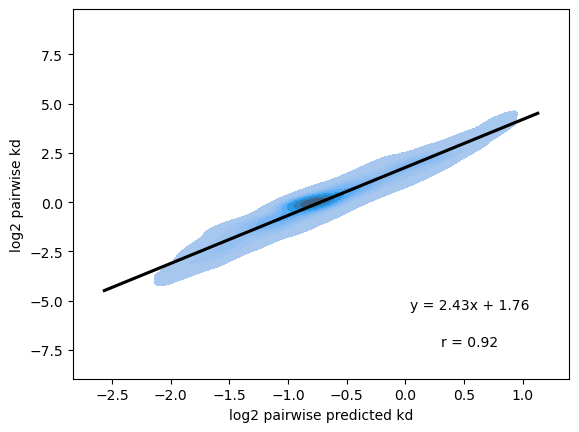

In [27]:
#plot log2 pairwise predicted kd vs log2 pairwise kd
sns.kdeplot(x=np.log2(pairwisePredictedKds), y=np.log2(kdsPairwise), fill=True)
plt.xlabel('log2 pairwise predicted kd')
plt.ylabel('log2 pairwise kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(pairwisePredictedKds), np.log2(kdsPairwise))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(pairwisePredictedKds), y=np.log2(kdsPairwise), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(pairwisePredictedKds), np.log2(kdsPairwise), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(pairwisePredictedKds), np.log2(kdsPairwise), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

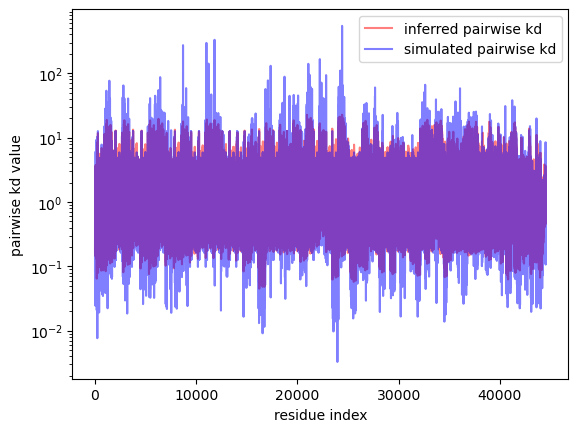

In [33]:
#lineplot of pairwise predictions
sns.lineplot(x=np.arange(0, len(predictionsPairwise)), y=2**(2.43*np.log2(pairwisePredictedKds)+1.76), label='inferred pairwise kd', color='red', alpha=0.5)
#lineplot of pairwise kd values
sns.lineplot(x=np.arange(0, len(kdsPairwise)), y=kdsPairwise, label='simulated pairwise kd', color='blue', alpha=0.5)
plt.xlabel('residue index')
plt.ylabel('pairwise kd value')
#log scale y axis
plt.yscale('log')
plt.legend()
plt.show()

In [35]:
input_size = len(open(training_path).readline().split(' ')) - 1
epistasisPairwise = MIMENet.inferEpistasis(model, input_size, singleKdCoefficient=1, singleKdIntercept=0, pairKdCoefficient=1, pairKdIntercept=0)
print(epistasisPairwise[0:10])
print(len(epistasisPairwise))

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]

[2.5215010959511375, 2.679885090440484, 2.588044718117297, 2.5463744654591034, 2.63032422697611, 2.579279289540818, 2.572522988248824, 2.594787972101721, 2.5783243479101796, 2.58892868470253]
44550


In [36]:
#load pairwise epistasis values
epistasisPairwiseSim = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_epistasis.txt')
print(epistasisPairwiseSim[0:10])
print(len(epistasisPairwiseSim))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
44550


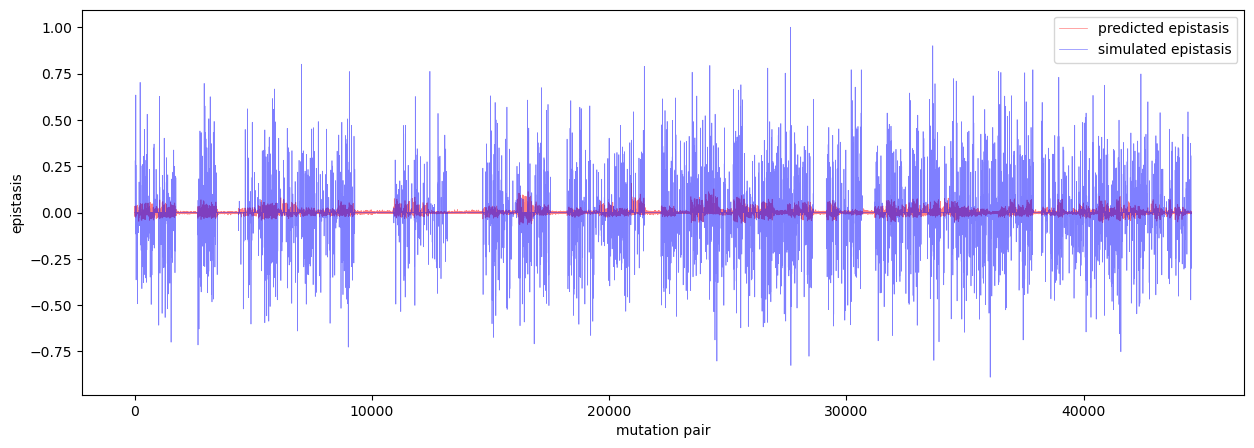

In [51]:
#log transform epistasis values
epistasisPairwiseLog = np.log(epistasisPairwise)
epistasisPairwiseSimLog = np.log(epistasisPairwiseSim)

#normalize predictions and simulated epistasis values
epistasisPairwiseNorm = ((epistasisPairwise - np.mean(epistasisPairwise))/np.max(epistasisPairwise))
epistasisPairwiseSimNorm = ((epistasisPairwiseSim - np.mean(epistasisPairwiseSim))/np.max(epistasisPairwiseSim))

#normalize log transformed predictions and simulated epistasis values
epistasisPairwiseLogNorm = ((epistasisPairwiseLog - np.mean(epistasisPairwiseLog))/np.max(epistasisPairwiseLog))
epistasisPairwiseSimLogNorm = ((epistasisPairwiseSimLog - np.mean(epistasisPairwiseSimLog))/np.max(epistasisPairwiseSimLog))

#center predictions and simulated epistasis values
epistasisPairwiseCenter = (epistasisPairwise - np.mean(epistasisPairwise))
epistasisPairwiseSimCenter = (epistasisPairwiseSim - np.mean(epistasisPairwiseSim))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(epistasisPairwise)), y=epistasisPairwiseLogNorm, label='predicted epistasis', color='red', alpha=0.5, linewidth=.5)
sns.lineplot(x=np.arange(0, len(epistasisPairwiseSim)), y=epistasisPairwiseSimLogNorm, label='simulated epistasis', color='blue', alpha=0.5, linewidth=.5)
plt.xlabel('mutation pair')
plt.ylabel('epistasis')
#increase fig size
plt.gcf().set_size_inches(15, 5)